In [2]:
from collections import deque


class Queue:
    def __init__(self):
        self.buffer = deque()

    def enqueue(self, val):
        self.buffer.appendleft(val)

    def dequeue(self):
        return self.buffer.pop()

    def is_empty(self):
        return len(self.buffer) == 0

    def size(self):
        return len(self.buffer)


In [3]:
import random


def get_random_direction():

    if random.randint(0, 1) == 0:
        direction = "North"
    else:
        direction = "West"
    return direction


class Vehicle:

    def __init__(self):
        self.direction = get_random_direction()

    def get_direction(self):
        return self.direction


class Car(Vehicle):
    def __init__(self):
        super().__init__()
        self.time_cost = 2

    def get_time_cost(self):
        return self.time_cost


class Truck(Vehicle):
    def __init__(self):
        super().__init__()
        self.time_cost = 5

    def get_time_cost(self):
        return self.time_cost

In [4]:
from Queue import Queue
import random
import Vehicle
from Vehicle import Car, Truck
import matplotlib.pyplot as plt
import numpy as np

class Simulation(object):
    north = Queue()
    west = Queue()
    cars_in_north = []
    cars_in_west = []
    
    def populate_north(self):
        if random.randint(0, 5) == 0:
            self.north.enqueue(Car())

    def populate_west(self):
        if random.randint(0, 5) == 0:
            self.west.enqueue(Car())

    def process_north(self):
        for i in range(5):
            if not (self.north.is_empty()):
                self.north.dequeue()

    def process_west(self):
        for i in range(5):
            if not (self.west.is_empty()):
                self.west.dequeue()

    def simulate(self):
        time = 0
        tc = 0
        light = 0
        while time < 3600:
            self.populate_north()
            self.populate_west()

            if light == 0 and tc <= 5 and not self.north.is_empty():
                self.populate_north()
                self.populate_west()
                self.north.dequeue()
                tc += 1
            elif light == 1 & tc <= 5 and not self.west.is_empty():
                self.populate_west()
                self.populate_north()
                self.west.dequeue()
                tc += 1
            elif light == 0 & tc > 5:
                light = 1
                tc = 0
                self.populate_west()
                self.populate_north()
            elif light == 1 & tc > 5:
                light = 0
                tc = 0
                self.populate_west()
                self.populate_north()
            else:
                pass

            time += 1
            self.cars_in_north.append(self.north.size())
            self.cars_in_west.append(self.west.size())

        print(self.north.size())
        print(self.west.size())


s = Simulation()
s.simulate()
len(s.cars_in_north)
plot1 = plt.plot(np.arange(0, 3600).tolist(), s.cars_in_north)

ModuleNotFoundError: No module named 'Queue'

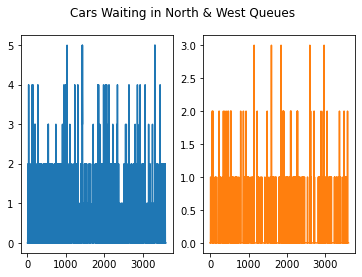

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Simulation2:
    north = 0
    west = 0
    light = 0
    time = 0
    tc = 0
    cars_north = []
    cars_west = []
    
    
    while time < 3600:
        if random.randint(0, 10) == 0:
            north += 2
        if random.randint(0, 10) == 0:
            west += 1
            
        if light == 1 and west > 0:
            west -= 1
        elif light == 0 and north > 0:
            north -= 1
        else: pass
            
        if tc == 5:
            tc = 0
            if light == 1:
                light = 0
            else: light = 1
                
        tc += 1
        time += 1
        cars_north.append(north)
        cars_west.append(west)
        
   # plt.plot(np.arange(0, 3600).tolist(), cars_north)
   # plt.plot(np.arange(0, 3600).tolist(), cars_west)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Cars Waiting in North & West Queues')
    ax1.plot(np.arange(0, 3600).tolist(), cars_north)
    ax2.plot(np.arange(0, 3600).tolist(), cars_west, 'tab:orange')

0.04555555555555556


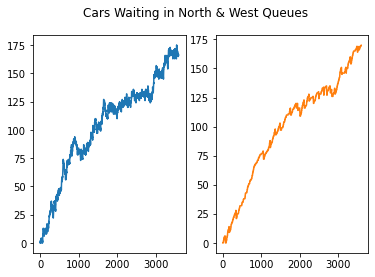

In [33]:
class Simulation3:
    north = 0
    west = 0
    light = 0
    time = 0
    tc = 0
    tr = 0
    tg = 0
    cars_north = []
    cars_west = []
    
    
    while time < 3600:
        north = north + np.random.poisson(1)
        
        if random.randint(0, 10) == 0:
            west += 1
            
        if light == 1 and west > 0:
            west -= 1
        elif light == 0 and north > 0:
            if north > 1:
                north -= 1
            else: north -= 1
        else: pass
            
        if abs(north - west) > 5:
            if north > west and light == 1:
                light = 0
            elif west > north and light == 0:
                light = 1
            else: pass
            
        if light == 0:
            tg += 1
        elif light == 1:
            tr += 1
        else: pass
        
        tc += 1
        
        time += 1
        cars_north.append(north)
        cars_west.append(west)
        
   # plt.plot(np.arange(0, 3600).tolist(), cars_north)
   # plt.plot(np.arange(0, 3600).tolist(), cars_west)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Cars Waiting in North & West Queues')
    ax1.plot(np.arange(0, 3600).tolist(), cars_north)
    ax2.plot(np.arange(0, 3600).tolist(), cars_west, 'tab:orange')
    fraction = tr/time
    print(fraction)

In [17]:
#Ratio of cars generated from Poisson Distribution vs uniform distribution

x = 0
for i in range(3600):
    x += np.random.poisson(1)

y = 0
for j in range(3600):
    if random.randint(0, 10) == 0:
        y += 1
print(y/x)



0.09400055294442909
